<a href="https://colab.research.google.com/github/arpanira/My_Repo/blob/main/b1_SentimentAnalysis_with_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plan of Action


1.   Load **IMDb Movie Reviews dataset (50,000 reviews)**
2.   **Pre-process dataset** by removing special characters, numbers, etc. from user reviews + convert **sentiment labels** positive & negative to numbers 1 & 0, respectively
3.   **Import GloVe Word Embedding** to build Embedding Dictionary + Use this to build Embedding Matrix for our Corpus
4. Model Training using **Deep Learning in Keras** for separate: **Simple Neural Net, CNN and LSTM Models** and analyse model performance and results
4. Last, perform **predictions on real IMDb movie reviews**

## Setting the environment

In [ ]:
# # Mounting google drive

from google.colab import drive
drive.mount('/content/Colab_Notebooks')

Drive already mounted at /content/Colab_Notebooks; to attempt to forcibly remount, call drive.mount("/content/Colab_Notebooks", force_remount=True).


In [ ]:
# # Setting toolkit folder as working directory

#%cd /My Drive/Colab_Notebooks/Project_SentimentAnalysis_with_NeuralNetwork
#! ls

[Errno 2] No such file or directory: '/My Drive/Colab_Notebooks/Project_SentimentAnalysis_with_NeuralNetwork'
/content
sample_data


In [ ]:
!pip install tensorflow

In [ ]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf


In [ ]:
from keras.preprocessing.text import one_hot,Tokenizer
from keras.models import Sequential
from keras.layers import Activation,Dropout,Dense
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Flatten,Embedding,Conv1D,LSTM
from sklearn.model_selection import train_test_split

#while both Flatten and GlobalMaxPoolingID layers converts the spatial dimension into ID vector.
#Flatten preserves all values of vector while GlobalMaxPoolingID only preserves the maximum value from each feature
#Use Cases: Flatten is more versatile and can be used in a broader range of scenarios()
#, while GlobalMaxPooling1D is often used in NLP tasks where capturing the most relevant information from the entire sequence is crucial.
#For tasks where preserving spatial relationships across the entire sequence is important, GlobalMaxPooling1D may be preferred.
#For tasks where spatial relationships are less important, and you want to retain all information in a flattened vector, Flatten might be a suitable choice.
#Operation: The Flatten layer is used to flatten the input tensor into a one-dimensional vector. It reshapes the input tensor by simply concatenating all the values in the tensor, regardless of their position in the spatial dimensions.
#Use Case: Typically used after convolutional layers when working with image data (2D) or after recurrent layers in the case of sequential data (e.g., time series).
#Output Shape: The output shape is a one-dimensional vector.
#Embedding
"""An embedding layer is a fundamental component in neural networks, especially in natural language processing (NLP) tasks. The primary purpose of an embedding layer is to convert categorical data, such as words or tokens, into continuous vector representations (embeddings) that can be processed by a neural network."""
#Convolutional Operation:Conv1D performs convolutional operations on one-dimensional input data. In the context of NLP, this is often applied to sequences of word embeddings or other one-dimensional representations.
#LSTM:

#gradients (derivatives of the loss with respect to each parameters).Gradients indicate how much the loss function would increase or decrease if the weights were adjusted.
#When backpropogation happens when there are too many layers,derivative of cost function at some layer almost beomes zero.
#Propagation Through Layers:In deep neural networks, gradients are propagated backward through the layers from the output layer to the input layer.
#Each layer contributes to the gradients by multiplying the gradients from the layer above it with the local gradients.
#Issue:The vanishing gradient problem occurs when the gradients become extremely small as they are propagated backward through many layers. In some cases, the gradients may become so close to zero that the weights of the earlier layers hardly get updated during training.
#Consequence:If the gradients vanish, the network has difficulty learning meaningful representations, especially in deep architectures. Layers that receive small gradients essentially stop learning, and the network fails to capture complex relationships in the data.
#Solution for vanishing gradient descent:Sigmoid and tanh activation functions are more prone to vanising gradient descent.
#Weight Initialization: Proper initialization of weights can help alleviate the vanishing gradient problem. Techniques like Xavier/Glorot initialization are designed to set initial weights in a way that balances the variance of activations across layers.
#Batch Normalization: Batch normalization normalizes the inputs to a layer, reducing internal covariate shift. It has been shown to help with the vanishing gradient problem.
#Skip Connections/Residual Networks (ResNets): Residual networks introduce skip connections that allow gradients to flow directly through the network, mitigating the vanishing gradient issue.
#Activation Functions: The use of activation functions like ReLU (Rectified Linear Unit) that do not squash positive values can help address the vanishing gradient problem to some extent.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
pwd

'/content'

In [ ]:
ls

Colab_Notebooks/  sample_data/


## Loading dataset

In [ ]:
# Importing IMDb Movie Reviews dataset

movie_reviews = pd.read_csv("/content/Colab_Notebooks/MyDrive/a1_IMDB_Dataset.csv")

# dataset source: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
# Dataset exploration

movie_reviews.shape

(50000, 2)

In [ ]:
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Checking for missing values

movie_reviews.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

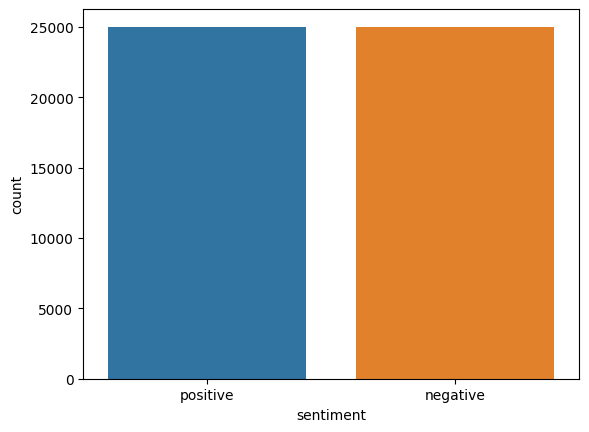

In [ ]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews)

## Data Preprocessing

In [ ]:
movie_reviews["review"][2]

# You can see that our text contains punctuations, brackets, HTML tags and numbers
# We will preprocess this text in the next section

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
movie_reviews_2=movie_reviews.sample(100,random_state=100,ignore_index=True)

In [ ]:
movie_reviews_2["review"][2]

'It\'s strange what fate does to some people. While looking in the discount bin at a DVD retailer, I came across a copy of Deadly Instincts. Being a collector of any film that is either sci-fi, horror or featuring alien monsters, I decided to buy it (not to mention the fact that it cost five dollars \x96 a bargain, believe me). After viewing it, I came to the opinion that it was nothing special. But after doing some research on the Internet, I discovered that the film was actually called Breeders & was a remake of the Tim Kincaid horror flick that menaced video stores in the mid-1980s. Which I\'ve already seen. My appreciation of "Deadly Instincts" grew following that discovery.<br /><br />A meteorite crashes on the lawn next to a private girls\' college. The sole teacher there, Ashley (played by Todd Jensen \x96 that\'s right, the guy who gets turned into a cyborg in the cult flick CYBORG COP four years earlier), notices that some of the students are beginning to disappear, while enco

In [ ]:
# TAG_RE=re.compile(r'<[^>]+>')
# def remove_tags(text):
#   """Remove HTML tags .Remove anything between opening and closing <> with empty space"""
#   return TAG_RE.sub('',text)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import string

In [ ]:
#Let us create tokens from the data, free of punctuations and numbers,spaces and any special charcatres
#Let us define the function for cleaning the data

def clean_data(text):
  tokens=text.split()
  #tokens = word_tokenize(text)
  table=str.maketrans('','',string.punctuation)  #creating a translation table to replace all punctutaions !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ with ''
  tokens=[w.translate(table) for w in tokens]   #Applying table translate on every element in list
  tokens=[w for w in tokens if w.isalpha()]     #creating the tokens only if word is alphabetic
  tokens=[w.lower() for w in tokens]            #converting all tokens to lowercase
  filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

  return ' '.join(filtered_tokens)

In [ ]:
# def preprocess_text(sen):
#     '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
#      in lowercase'''

#     sentence = sen.lower()

#     #Remove html tags
#     sentence = remove_tags(sentence)

#     #Remove punctuations and numbers
#      sentence = re.sub('[^a-zA-Z]', ' ', sentence)

#     Single character removal
#      sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

#    Remove multiple spaces
#     sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

#     Remove Stopwords
#      pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
#      sentence = pattern.sub('', sentence)

#      return sentence

In [ ]:
# Calling preprocessing_text function on movie_reviews

X = []
sentences = list(movie_reviews_2['review'])
for sen in sentences:
    X.append(clean_data(sen))

In [ ]:
# Sample cleaned up movie review

X[5]


'rented dvd two reasons cast great actors director even though robert altman hit miss case big miss altmans attempt creating suspense fell keester seeing kenneth branagh good film like dead didnt think could possibly contribute turkey hope didnt ruin reputation robert duvall seems fallen way onetime oscar winners downward spiral includes acting eatingmoney films one duvall great actor excellent films even though best performance tender mercies great santini movie truly big waste time give'

In [ ]:
print(movie_reviews_2["review"][5])
print(X[5])

I rented this DVD for two reasons. A cast of great actors, and the director, even though Robert Altman can be hit or miss. In this case, it was a big miss. Altman's attempt at creating suspense fell on its keester. After seeing Kenneth Branagh in a good film like "Dead Again", I didn't think he could possibly contribute to such a turkey, and I hope it didn't ruin his reputation. Robert Duvall seems to have fallen the way of most one-time Oscar winners. On a downward spiral that includes acting in eating-money films such as this one. Duvall was once a great actor in excellent films, even though his best performance was not "Tender Mercies", but "The Great Santini". This movie was truly a big waste of time. I give it a 2 out of 10.
rented dvd two reasons cast great actors director even though robert altman hit miss case big miss altmans attempt creating suspense fell keester seeing kenneth branagh good film like dead didnt think could possibly contribute turkey hope didnt ruin reputation

In [ ]:
import pandas as pd
import numpy as np
sample_data=pd.DataFrame({"stmnt":["Archana good girl!","Tom bad boy:(","Archana is awesome:)","Tom stinks","Movie was great!"],"feels":["good","bad","good","bad","good"]})

In [ ]:
X=sample_data["stmnt"].values

In [ ]:
X

array(['Archana good girl', 'Tom bad boy', 'Archana awesome',
       'Tom stinks', 'Movie was awesome'], dtype=object)

In [ ]:
def clean_data_dummy(text):
  tokens=text.split()
  tokens1=word_tokenize(text)

In [ ]:
# Converting sentiment labels to 0 & 1

y = movie_reviews_2['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

In [ ]:
X_train

['supposed funny one films doesnt work first one bruce almighty jim carey funny moments one nonebr br steve carrell brilliant bruce almighty fails deliver performance ordinary cant carry like carey didbr br one good thing paid rent movie childrenvery young children seen films short livesbr br interesting note jim carey stars film make sequel without usually huge turkey anyone remember son mask imdb worst films time avoid one movie lovers',
 'otherwise excellent book lincoln american memory historian merrill peterson calls young mrlincoln boring dreadful film amazingly wrongheaded analysis simply proves great historians rarely fine film critics working doctoral dissertation abraham lincoln frederick douglass part preparation writing dissertation made careful analysis film tag gallaghers brilliant interpretation seminal book ford young mr lincoln comes culminating year first phase fords cinematic authorship greatest hollywood years ford directed three superb still fully appreciated films

## Preparing embedding layer

Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then **used as the first layer for the deep learning models in Keras**.

In [ ]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
import io
import json

In [ ]:
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

3533

In [ ]:
len(X_train)

80

In [ ]:
max_len=10
for i in X_train:
  if len(i)>max_len:
    max_len=len(i)
  else:
   max_len=max_len
print(max_len)



364


In [ ]:
sequences = [[1, 2, 3], [4, 5], [6, 7, 8, 9],[1, 2, 3],[1, 2, 3],[1, 2, 3],[1, 2, 3]]

# Pad sequences to a common length (default padding is 0)
padded_sequences = pad_sequences(sequences, padding='post',maxlen=3)

print("Original Sequences:")
print(sequences)
print("\nPadded Sequences:")
print(padded_sequences)

Original Sequences:
[[1, 2, 3], [4, 5], [6, 7, 8, 9], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

Padded Sequences:
[[1 2 3]
 [4 5 0]
 [7 8 9]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


In [ ]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(92394, 100)

# Model Training with:

## Simple Neural Network

In [ ]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9239400   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9,249,401
Trainable params: 10,001
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [ ]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 4s 10ms/step - loss: 0.5548 - acc: 0.7180 - val_loss: 0.5057 - val_acc: 0.7576
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4483 - acc: 0.7955 - val_loss: 0.4928 - val_acc: 0.7640
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4119 - acc: 0.8148 - val_loss: 0.4998 - val_acc: 0.7654
Epoch 4/6
250/250 [==============================] - 4s 15ms/step - loss: 0.3891 - acc: 0.8299 - val_loss: 0.5101 - val_acc: 0.7595
Epoch 5/6
250/250 [==============================] - 2s 7ms/step - loss: 0.3753 - acc: 0.8362 - val_loss: 0.5349 - val_acc: 0.7558
Epoch 6/6
250/250 [==============================] - 2s 8ms/step - loss: 0.3646 - acc: 0.8418 - val_loss: 0.5354 - val_acc: 0.7544


In [ ]:
# # Model training

# snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 2s 6ms/step - loss: 0.5589 - acc: 0.7134 - val_loss: 0.5088 - val_acc: 0.7565
Epoch 2/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4514 - acc: 0.7925 - val_loss: 0.5067 - val_acc: 0.7580
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4159 - acc: 0.8130 - val_loss: 0.5002 - val_acc: 0.7646
Epoch 4/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3918 - acc: 0.8273 - val_loss: 0.5084 - val_acc: 0.7615
Epoch 5/6
250/250 [==============================] - 1s 6ms/step - loss: 0.3753 - acc: 0.8370 - val_loss: 0.5188 - val_acc: 0.7584
Epoch 6/6
250/250 [==============================] - 1s 6ms/step - loss: 0.3624 - acc: 0.8435 - val_loss: 0.5325 - val_acc: 0.7558


In [ ]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.5696 - acc: 0.7461


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5695900917053223
Test Accuracy: 0.7461000084877014


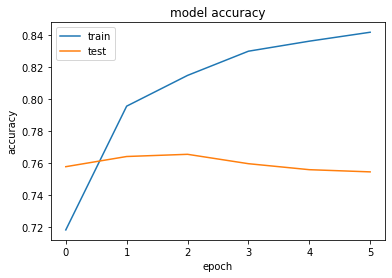

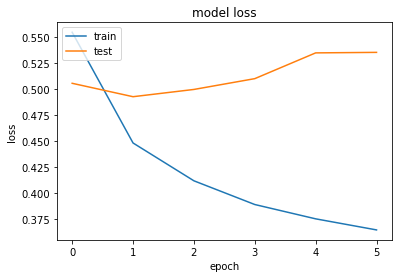

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Convolutional Neural Network

In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,303,657
Trainable params: 64,257
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [ ]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 27s 105ms/step - loss: 0.4672 - acc: 0.7751 - val_loss: 0.3811 - val_acc: 0.8301
Epoch 2/6
250/250 [==============================] - 23s 92ms/step - loss: 0.3370 - acc: 0.8546 - val_loss: 0.3480 - val_acc: 0.8480
Epoch 3/6
250/250 [==============================] - 23s 93ms/step - loss: 0.2814 - acc: 0.8874 - val_loss: 0.3426 - val_acc: 0.8481
Epoch 4/6
250/250 [==============================] - 23s 93ms/step - loss: 0.2364 - acc: 0.9126 - val_loss: 0.3339 - val_acc: 0.8512
Epoch 5/6
250/250 [==============================] - 23s 93ms/step - loss: 0.1946 - acc: 0.9353 - val_loss: 0.3325 - val_acc: 0.8530
Epoch 6/6
250/250 [==============================] - 23s 92ms/step - loss: 0.1596 - acc: 0.9536 - val_loss: 0.3386 - val_acc: 0.8528


In [ ]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 3s 11ms/step - loss: 0.3357 - acc: 0.8579


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3356787860393524
Test Accuracy: 0.8579000234603882


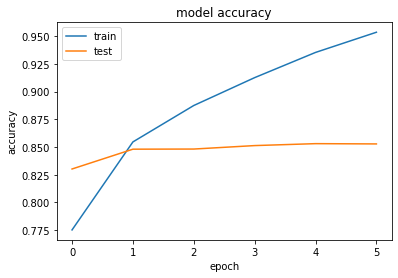

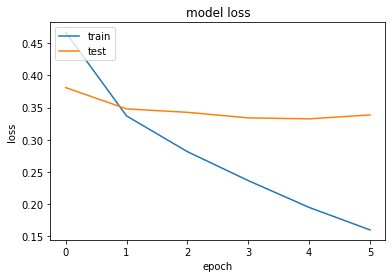

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## Recurrent Neural Network (LSTM)

In [ ]:
from keras.layers import LSTM

In [ ]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,356,777
Trainable params: 117,377
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 82s 320ms/step - loss: 0.5498 - acc: 0.7266 - val_loss: 0.4619 - val_acc: 0.7909
Epoch 2/6
250/250 [==============================] - 79s 317ms/step - loss: 0.4309 - acc: 0.8056 - val_loss: 0.4138 - val_acc: 0.8207
Epoch 3/6
250/250 [==============================] - 80s 319ms/step - loss: 0.3883 - acc: 0.8302 - val_loss: 0.3593 - val_acc: 0.8457
Epoch 4/6
250/250 [==============================] - 80s 318ms/step - loss: 0.3506 - acc: 0.8489 - val_loss: 0.3402 - val_acc: 0.8564
Epoch 5/6
250/250 [==============================] - 79s 317ms/step - loss: 0.3259 - acc: 0.8621 - val_loss: 0.3239 - val_acc: 0.8585
Epoch 6/6
250/250 [==============================] - 79s 317ms/step - loss: 0.3067 - acc: 0.8712 - val_loss: 0.3148 - val_acc: 0.8670


In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 11s 34ms/step - loss: 0.3194 - acc: 0.8643


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.31936636567115784
Test Accuracy: 0.864300012588501


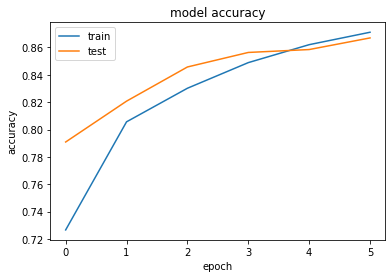

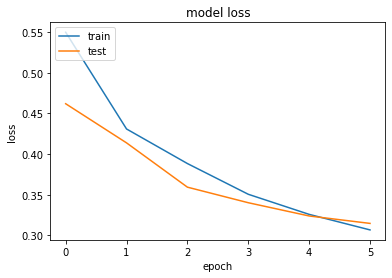

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model as a h5 file for possible use later

lstm_model.save(f"./c1_lstm_model_acc_{round(score[1], 3)}.h5", save_format='h5')

NameError: name 'lstm_model' is not defined

# Making Predictions on Live IMDb data

In [ ]:
pwd # lists files in working directory

'C:\\Users\\Gopal\\OneDrive\\Desktop\\Skillcate\\Projects\\movie-sentiment-analysis-with-deep-neural-networks'

In [ ]:
# Load previously trained LSTM Model

from keras.models import load_model

model_path ='c1_lstm_model_acc_0.864.h5'
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,356,777
Trainable params: 117,377
Non-trainable params: 9,239,400
_________________________________________________________________


In [ ]:
# Load sample IMDb reviews csv, having ~6 movie reviews, along with their IMDb rating

sample_reviews = pd.read_csv("a3_IMDb_Unseen_Reviews.csv")

sample_reviews.head(6)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10
5,5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3


In [ ]:
# Preprocess review text with earlier defined preprocess_text function

unseen_reviews = sample_reviews['Review Text']

unseen_processed = []
for review in unseen_reviews:
  review = custom.preprocess_text(review)
  unseen_processed.append(review)

In [ ]:
unseen_processed

['intelligent movie movie obviously allegorical fascinating tale ai mainly manipulation power wanting action spectacular cgi movie aimed people like think rather passively wait entertained themes ai also surveillance excellent points data us collected phone companies search engine companies commercial operating systems makers plot seems simple extremely clever protagonist playing games trying stay one step ahead one another movie perfectly consistent internal logic plays perfectly go expecting much however see people satisfied movie sets brilliantly therefore give least recent movies getting movie succeeds another recent movie ai transcendence think called failed interesting failure third movie ai spanish movie called eva also brilliant eva moving movie philosophical movies perfect different ways ai name movie ava seems nod title spanish movie aside nice stars appeared ex machina eva casting great course several aspects movie unrealistic often absurd allegorical movie acceptable movie 

In [ ]:
from keras_preprocessing.text import tokenizer_from_json

In [ ]:
# Loading
with open('b3_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [ ]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_processed)

In [ ]:
unseen_tokenized

[[925,
  1,
  1,
  400,
  14420,
  1289,
  627,
  14035,
  1266,
  7357,
  511,
  1524,
  97,
  1863,
  1370,
  1,
  3416,
  16,
  4,
  25,
  140,
  20211,
  716,
  2161,
  1270,
  14035,
  18,
  12177,
  199,
  659,
  9047,
  76,
  9587,
  1378,
  4780,
  1464,
  6932,
  4780,
  2013,
  7929,
  7741,
  1034,
  33,
  83,
  463,
  435,
  879,
  1740,
  282,
  1469,
  150,
  626,
  3,
  1434,
  1291,
  3,
  62,
  1,
  806,
  4114,
  5415,
  1989,
  191,
  806,
  51,
  854,
  13,
  88,
  11,
  16,
  4012,
  1,
  589,
  1958,
  1398,
  93,
  113,
  1014,
  24,
  270,
  1,
  2759,
  62,
  1014,
  1,
  14035,
  25602,
  25,
  315,
  1064,
  115,
  1852,
  736,
  1,
  14035,
  1776,
  1,
  315,
  3822,
  18,
  383,
  3822,
  569,
  1,
  4051,
  24,
  284,
  164,
  624,
  14035,
  261,
  1,
  12806,
  83,
  5440,
  294,
  1776,
  1,
  1011,
  213,
  278,
  1374,
  1040,
  14943,
  3822,
  897,
  17,
  151,
  312,
  1264,
  1,
  1928,
  285,
  1602,
  14420,
  1,
  3172,
  1,
  122,
  659,
  14

In [ ]:
# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [ ]:
unseen_padded

array([[  879,  1740,   282,  1469,   150,   626,     3,  1434,  1291,
            3,    62,     1,   806,  4114,  5415,  1989,   191,   806,
           51,   854,    13,    88,    11,    16,  4012,     1,   589,
         1958,  1398,    93,   113,  1014,    24,   270,     1,  2759,
           62,  1014,     1, 14035, 25602,    25,   315,  1064,   115,
         1852,   736,     1, 14035,  1776,     1,   315,  3822,    18,
          383,  3822,   569,     1,  4051,    24,   284,   164,   624,
        14035,   261,     1, 12806,    83,  5440,   294,  1776,     1,
         1011,   213,   278,  1374,  1040, 14943,  3822,   897,    17,
          151,   312,  1264,     1,  1928,   285,  1602, 14420,     1,
         3172,     1,   122,   659,   140, 13082,  1645, 10209,  1615,
          937],
       [  121,   234,   352,  8844,  6752,   630,    20,  6507,    72,
         1400,  6730,  2885, 24074, 10547,  3633,  1645,    25, 11701,
         1335, 19425,    26,   281,  1574,  1143,   288, 1370

In [ ]:
# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = pretrained_lstm_model.predict(unseen_padded)

unseen_sentiments

1/1 [==============================] - 1s 1s/step


array([[0.8834934 ],
       [0.99290115],
       [0.31473464],
       [0.27548054],
       [0.97470117],
       [0.04180601]], dtype=float32)

In [ ]:
# Writing model output file back to Google Drive

sample_reviews['Predicted Sentiments'] = np.round(unseen_sentiments*10,1)

df_prediction_sentiments = pd.DataFrame(sample_reviews['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_movie                 = pd.DataFrame(sample_reviews['Movie'], columns = ['Movie'])
df_review_text           = pd.DataFrame(sample_reviews['Review Text'], columns = ['Review Text'])
df_imdb_rating           = pd.DataFrame(sample_reviews['IMDb Rating'], columns = ['IMDb Rating'])


dfx=pd.concat([df_movie, df_review_text, df_imdb_rating, df_prediction_sentiments], axis=1)

dfx.to_csv("c2_IMDb_Unseen_Predictions.csv", sep=',', encoding='UTF-8')

dfx.head(6)

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,8.8
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.9
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,3.1
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,2.8
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.7
5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.4


In [ ]:
unseen_sentiments

array([[0.8834934 ],
       [0.99290115],
       [0.31473464],
       [0.27548054],
       [0.97470117],
       [0.04180601]], dtype=float32)

In [ ]:
unseen_sentiments[0][0]

0.8834934

In [ ]:
prediction_text= f"Positive Review with probable IMDb rating as: {np.round(unseen_sentiments[0][0]*10,1)}"

In [ ]:
prediction_text

'Positive Review with probable IMDb rating as: 8.8'